# <div style="text-align: center"> **PROYECTO FINAL** 
## **Machine Learning Pipeline & Prediction API**
#### Dulce Rocío Sosa Cerna _20000140_

In [2372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import joblib

### 1. Cargamos Dataset

In [2373]:
data = pd.read_csv('SupplyChain.csv', index_col=0, encoding='latin-1', delimiter= ';')

print(str(data.shape) + '\n')

data.head()

(180519, 28)



,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Customer City,Customer Country,Customer Id,Customer Lname,Customer Segment,Customer State,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order State,Order Status,Product Category Id,Product Name,Product Price,Shipping Mode
ï»¿Type,,,,,,,,,,,,,,,,,,,,,
DEBIT,314.640015,Advance shipping,0,73,Caguas,Puerto Rico,20755,Holloway,Consumer,PR,...,0.29,1,327.75,314.640015,Java Occidental,COMPLETE,73,Smart watch,327.75,Standard Class
TRANSFER,311.359985,Late delivery,1,73,Caguas,Puerto Rico,19492,Luna,Consumer,PR,...,-0.80,1,327.75,311.359985,RajastÃ¡n,PENDING,73,Smart watch,327.75,Standard Class
CASH,309.720001,Shipping on time,0,73,San Jose,EE. UU.,19491,Maldonado,Consumer,CA,...,-0.80,1,327.75,309.720001,RajastÃ¡n,CLOSED,73,Smart watch,327.75,Standard Class
DEBIT,304.809998,Advance shipping,0,73,Los Angeles,EE. UU.,19490,Tate,Home Office,CA,...,0.08,1,327.75,304.809998,Queensland,COMPLETE,73,Smart watch,327.75,Standard Class
PAYMENT,298.250000,Advance shipping,0,73,Caguas,Puerto Rico,19489,Hendricks,Corporate,PR,...,0.45,1,327.75,298.250000,Queensland,PENDING_PAYMENT,73,Smart watch,327.75,Standard Class


In [2374]:
#Eliminamos columnas de Id porque no son representativos para el analisis.
data.drop('Category Id', axis=1, inplace=True)
data.drop('Customer Id', axis=1, inplace=True)
data.drop('Product Category Id', axis=1, inplace=True)
data.drop('Order Customer Id', axis=1, inplace=True)
data.drop('Department Id', axis=1, inplace=True)
data.drop('Order Id', axis=1, inplace=True)
data.drop('Order Item Id', axis=1, inplace=True)


print(str(data.shape))

(180519, 21)


### 2. Análisis de Datos para toma de decisiones en FE Pipeline

### 2.1 Análisis del Target


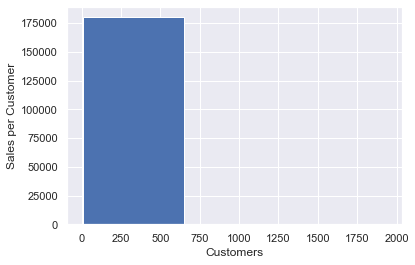

In [2375]:
data['Sales per customer'].hist(bins=3, density=False)
plt.xlabel("Customers")
plt.ylabel("Sales per Customer")
plt.show()

In [2376]:
data['Sales per customer']

ï»¿Type
DEBIT       314.640015
TRANSFER    311.359985
CASH        309.720001
DEBIT       304.809998
PAYMENT     298.250000
               ...    
CASH        399.980011
DEBIT       395.980011
TRANSFER    391.980011
PAYMENT     387.980011
PAYMENT     383.980011
Name: Sales per customer, Length: 180519, dtype: float64

### 2.2 Verificamos tipos de variables en X

In [2377]:
data.dtypes

Sales per customer          float64
Delivery Status              object
Late_delivery_risk            int64
Customer City                object
Customer Country             object
Customer Lname               object
Customer Segment             object
Customer State               object
Market                       object
Order City                   object
Order Country                object
Order Item Product Price    float64
Order Item Profit Ratio     float64
Order Item Quantity           int64
Sales                       float64
Order Item Total            float64
Order State                  object
Order Status                 object
Product Name                 object
Product Price               float64
Shipping Mode                object
dtype: object

In [2378]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

#Agregamos el caso especial Late_delivery_risk, ya que esta variable es categórica porque indica si el envío tuvo tardanza o no. 
cat_vars = cat_vars + ['Late_delivery_risk'] 

In [2379]:
#cantidad de varaibles categóricas
len(cat_vars)

14

In [2380]:
cat_vars

['Delivery Status',
 'Customer City',
 'Customer Country',
 'Customer Lname',
 'Customer Segment',
 'Customer State',
 'Market',
 'Order City',
 'Order Country',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode',
 'Late_delivery_risk']

In [2381]:
#Forzamos a todas las variables como categóticas, incluyendo Late_delivery_risk
data[cat_vars] = data[cat_vars].astype('O')

In [2382]:
#variables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Sales per customer')]

In [2383]:
len(num_vars)

6

In [2384]:
num_vars

['Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Product Price']

### 2.3 Análisis de Valores Faltantes

In [2385]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

1

In [2386]:
#proporcion de NAs en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

Customer Lname    0.000044
dtype: float64

In [2387]:
#variables categóricas con NAs.
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Customer Lname']

In [2388]:
#variables numéricas con NAs.
num_na = [var for var in num_vars if var in var_with_na]
num_na

[]

In [2389]:
print("Cantidad de variables numéricas con NAs. {}".format(len(num_na)))
print("Cantidad de variables categóricas con NAs. {}".format(len(cat_na)))

Cantidad de variables numéricas con NAs. 0
Cantidad de variables categóricas con NAs. 1


#### 2.3.1 Verificación del impacto del NA contra el Target (Survived)

In [2390]:
df= data.copy()
var= 'Customer Lname'
df [var]= np.where(df[var].isnull(), 1, 0)
temp = df.groupby(var)['Sales per customer'].agg(['mean', 'std'])

In [2391]:
temp

,mean,std
Customer Lname,,
0,183.101636,120.041376
1,317.867502,99.566648


In [2392]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

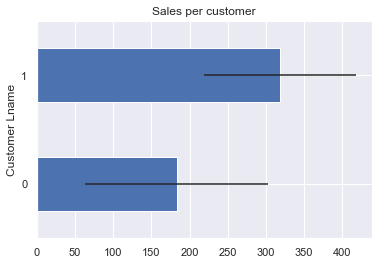

In [2393]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Sales per customer')

### 2.4 Análisis de Variables Temporales

In [2394]:
year_vars = [var for var in num_vars if (('Yr' in var) or ('Year' in var))]
year_vars

[]

No tenemos variables temporales en la data.

#### Análisis Estadístico

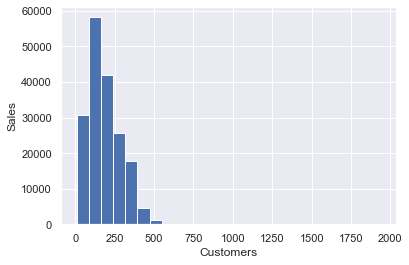

In [2395]:
data['Sales per customer'].hist(bins=25, density=False)
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()

El comportamiento de la variable Target "Sales per customer" tiene una distribución normal, un poco sesgada hacia la izquierda. Las ventas mayores alcanzan casi los 60,000.

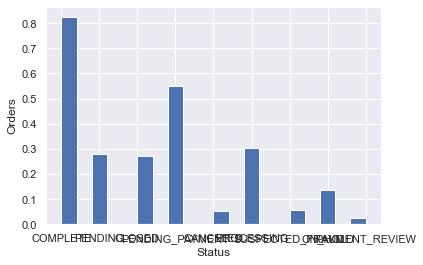

In [2396]:
data['Order Status'].hist(bins=20, density=True)
plt.xlabel("Status")
plt.ylabel("Orders")
plt.show()

La mayoría de ordenes estan en status Complete.

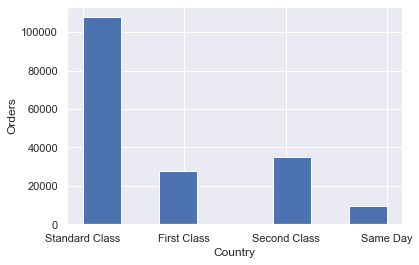

In [2397]:
data['Shipping Mode'].hist(bins=8, density=False)
plt.xlabel("Country")
plt.ylabel("Orders")
plt.show()


El shipping mode mas alto es el de Standard Class.

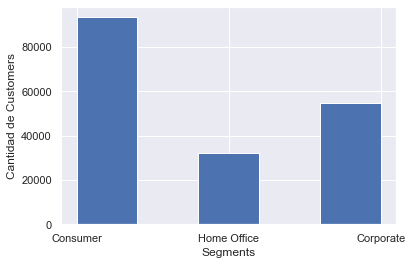

In [2398]:
data['Customer Segment'].hist(bins=5, density=False)
plt.xlabel("Segments")
plt.ylabel("Cantidad de Customers")
plt.show()

La mayoría de clientes son de segmento "Consumer".

In [2399]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20) and (var not in year_vars))]
discrete_vars

['Order Item Quantity']

### 2.5 Variables Discretas

In [2400]:
len(data['Order Item Quantity'].unique()) < 20

True

In [2401]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20) and (var not in year_vars))]
discrete_vars

['Order Item Quantity']

In [2402]:
print("Cantidad de Variables Discretas: ", len(discrete_vars))

Cantidad de Variables Discretas:  1


In [2403]:
data[discrete_vars].head()

,Order Item Quantity
ï»¿Type,
DEBIT,1
TRANSFER,1
CASH,1
DEBIT,1
PAYMENT,1


In [2404]:
import seaborn as sns

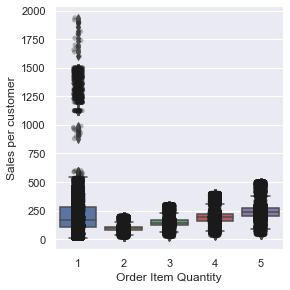

In [2405]:
for var in discrete_vars:
    sns.catplot(x=var, y= 'Sales per customer', data=data, kind="box", height=4)
    sns.stripplot(x=var, y='Sales per customer', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

### 2.6 Variables Continuas

In [2406]:
cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars]

In [2407]:
print("Variables Numericas Continuas: ", len(cont_vars))

Variables Numericas Continuas:  5


In [2408]:
data[cont_vars].head()

,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Product Price
ï»¿Type,,,,,
DEBIT,327.75,0.29,327.75,314.640015,327.75
TRANSFER,327.75,-0.80,327.75,311.359985,327.75
CASH,327.75,-0.80,327.75,309.720001,327.75
DEBIT,327.75,0.08,327.75,304.809998,327.75
PAYMENT,327.75,0.45,327.75,298.250000,327.75


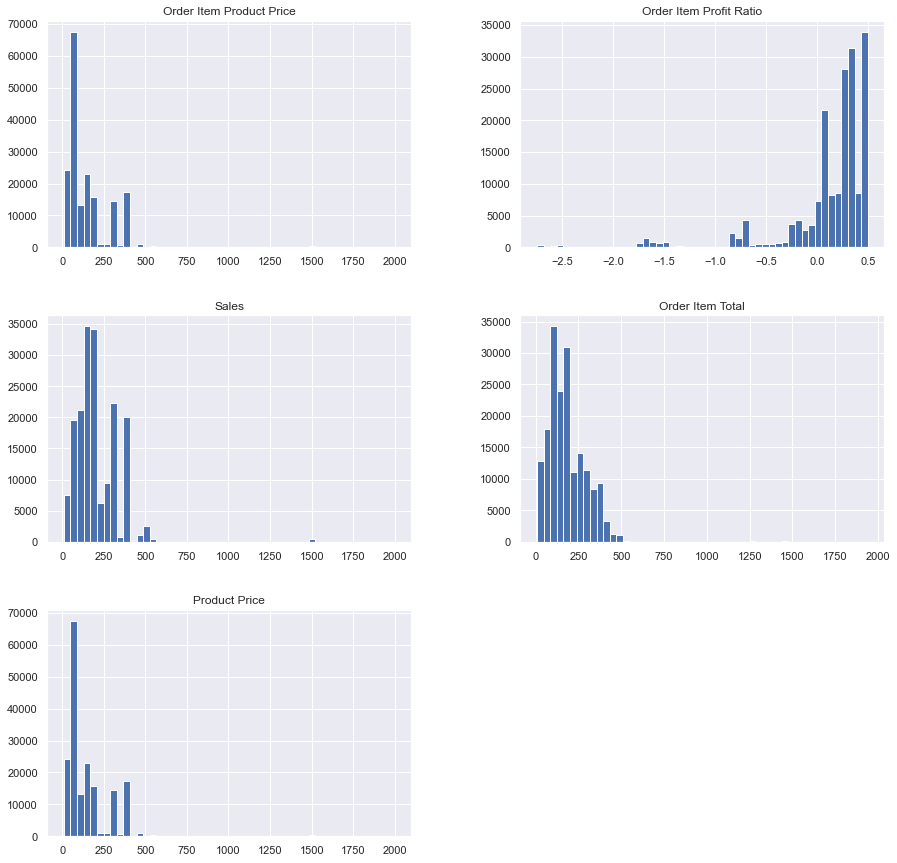

In [2409]:
data[cont_vars].hist(bins=50, figsize=(15, 15))
plt.show()

In [2410]:
cont_vars

['Order Item Product Price',
 'Order Item Profit Ratio',
 'Sales',
 'Order Item Total',
 'Product Price']

#### Transformación de Yeo-Johnson

In [2411]:
import scipy.stats as stats

In [2412]:
temp_yj = data.copy()

In [2413]:
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

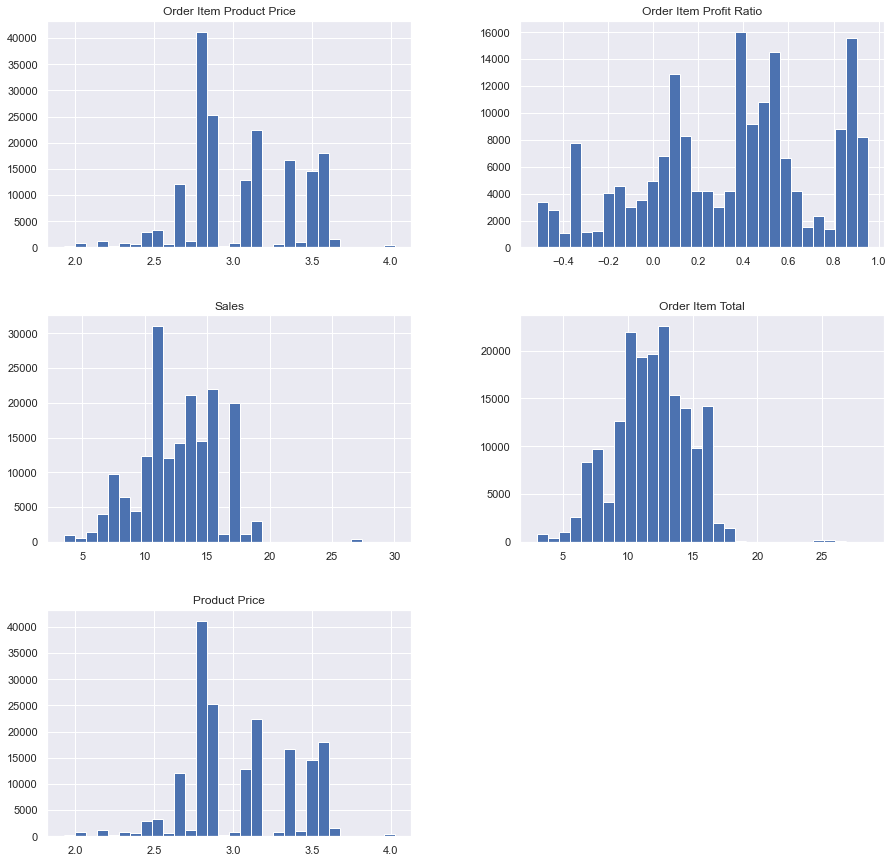

In [2414]:
temp_yj[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [2415]:
len(cont_vars)

5

In [2416]:
cont_vars = [var for var in cont_vars if var not in sesgadas]

In [2417]:
cont_vars

['Order Item Product Price',
 'Order Item Profit Ratio',
 'Sales',
 'Order Item Total',
 'Product Price']

### 2.7 Variables Categóricas

In [2418]:
len(cat_vars)

14

In [2419]:
data[cat_vars].head()

,Delivery Status,Customer City,Customer Country,Customer Lname,Customer Segment,Customer State,Market,Order City,Order Country,Order State,Order Status,Product Name,Shipping Mode,Late_delivery_risk
ï»¿Type,,,,,,,,,,,,,,
DEBIT,Advance shipping,Caguas,Puerto Rico,Holloway,Consumer,PR,Pacific Asia,Bekasi,Indonesia,Java Occidental,COMPLETE,Smart watch,Standard Class,0
TRANSFER,Late delivery,Caguas,Puerto Rico,Luna,Consumer,PR,Pacific Asia,Bikaner,India,RajastÃ¡n,PENDING,Smart watch,Standard Class,1
CASH,Shipping on time,San Jose,EE. UU.,Maldonado,Consumer,CA,Pacific Asia,Bikaner,India,RajastÃ¡n,CLOSED,Smart watch,Standard Class,0
DEBIT,Advance shipping,Los Angeles,EE. UU.,Tate,Home Office,CA,Pacific Asia,Townsville,Australia,Queensland,COMPLETE,Smart watch,Standard Class,0
PAYMENT,Advance shipping,Caguas,Puerto Rico,Hendricks,Corporate,PR,Pacific Asia,Townsville,Australia,Queensland,PENDING_PAYMENT,Smart watch,Standard Class,0


<AxesSubplot:>

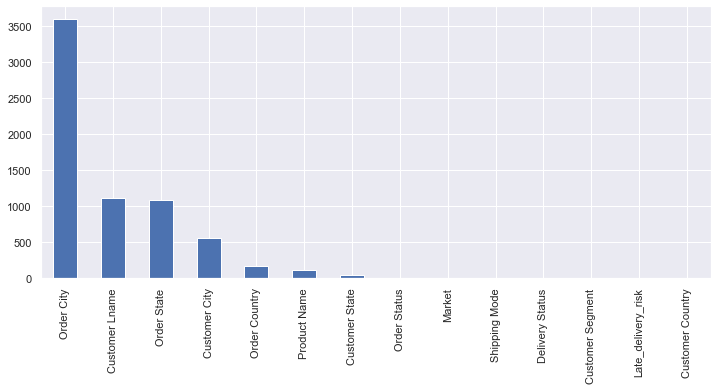

In [2420]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [2421]:
data['Order City']

ï»¿Type
DEBIT           Bekasi
TRANSFER       Bikaner
CASH           Bikaner
DEBIT       Townsville
PAYMENT     Townsville
               ...    
CASH         ShanghÃ¡i
DEBIT         Hirakata
TRANSFER      Adelaide
PAYMENT       Adelaide
PAYMENT      Nagercoil
Name: Order City, Length: 180519, dtype: object

In [2422]:
data['Customer Lname']

ï»¿Type
DEBIT        Holloway
TRANSFER         Luna
CASH        Maldonado
DEBIT            Tate
PAYMENT     Hendricks
              ...    
CASH         Peterson
DEBIT           Clark
TRANSFER        Smith
PAYMENT         Smith
PAYMENT        Ortega
Name: Customer Lname, Length: 180519, dtype: object

In [2423]:
data['Order State']

ï»¿Type
DEBIT         Java Occidental
TRANSFER            RajastÃ¡n
CASH                RajastÃ¡n
DEBIT              Queensland
PAYMENT            Queensland
                  ...        
CASH                ShanghÃ¡i
DEBIT                   Osaka
TRANSFER    Australia del Sur
PAYMENT     Australia del Sur
PAYMENT            Tamil Nadu
Name: Order State, Length: 180519, dtype: object

In [2424]:
np.unique(data['Delivery Status'])

array(['Advance shipping', 'Late delivery', 'Shipping canceled',
       'Shipping on time'], dtype=object)

In [2425]:
np.unique(data['Customer Segment'])

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [2426]:
np.unique(data['Customer Country'])

array(['EE. UU.', 'Puerto Rico'], dtype=object)

In [2427]:
np.unique(data['Shipping Mode'])

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [2428]:
np.unique(data['Market'])

array(['Africa', 'Europe', 'LATAM', 'Pacific Asia', 'USCA'], dtype=object)

In [2429]:
np.unique(data['Customer State'])

array(['91732', '95758', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'MI', 'MN', 'MO', 'MT', 'NC', 'ND', 'NJ', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA',
       'WA', 'WI', 'WV'], dtype=object)

In [2430]:
np.unique(data['Order Status'])

array(['CANCELED', 'CLOSED', 'COMPLETE', 'ON_HOLD', 'PAYMENT_REVIEW',
       'PENDING', 'PENDING_PAYMENT', 'PROCESSING', 'SUSPECTED_FRAUD'],
      dtype=object)

##### Transformando variables categóricas

In [2431]:
#Delivery Status
delivery_mapping = {'Advance shipping':1, 'Late delivery':2, 'Shipping canceled':3, 'Shipping on time':4, 
                    'Missing':0, 'NA':0, 'NaN':0}

In [2432]:
delivery_var = ['Delivery Status']

In [2433]:
for var in delivery_var:
    data[var] = data[var].map(delivery_mapping)

In [2434]:
data[delivery_var].head()

,Delivery Status
ï»¿Type,
DEBIT,1
TRANSFER,2
CASH,4
DEBIT,1
PAYMENT,1


In [2435]:
#Customer Segment
segment_mapping = {'Consumer':1, 'Corporate':2, 'Home Office':3, 'Missing':0, 'NA':0, 'NaN':0}

In [2436]:
segment_var = ['Customer Segment']

In [2437]:
for var in segment_var:
    data[var] = data[var].map(segment_mapping)

In [2438]:
data[segment_var].head()

,Customer Segment
ï»¿Type,
DEBIT,1
TRANSFER,1
CASH,1
DEBIT,3
PAYMENT,2


In [2439]:
#Customer Country
country_mapping = {'EE. UU.':1, 'Puerto Rico':2, 'Missing':0, 'NA':0, 'NaN':0}

In [2440]:
country_var = ['Customer Country']

In [2441]:
for var in country_var:
    data[var] = data[var].map(country_mapping)

In [2442]:
data[country_var].head()

,Customer Country
ï»¿Type,
DEBIT,2
TRANSFER,2
CASH,1
DEBIT,1
PAYMENT,2


In [2443]:
#Shipping Mode
shipping_mapping = {'First Class':1, 'Same Day':2, 'Second Class':3, 'Standard Class':4, 'Missing':0, 'NA':0, 'NaN':0}

In [2444]:
shipping_var = ['Shipping Mode']

In [2445]:
for var in shipping_var:
    data[var] = data[var].map(shipping_mapping)

In [2446]:
data[shipping_var].head()

,Shipping Mode
ï»¿Type,
DEBIT,4
TRANSFER,4
CASH,4
DEBIT,4
PAYMENT,4


In [2447]:
#Market
market_mapping = {'Africa':1, 'Europe':2, 'LATAM':3, 'Pacific Asia':4, 'USCA':5, 'Missing':0, 'NA':0, 'NaN':0}

In [2448]:
market_var = ['Market']

In [2449]:
for var in market_var:
    data[var] = data[var].map(market_mapping)

In [2450]:
data[market_var].head()

,Market
ï»¿Type,
DEBIT,4
TRANSFER,4
CASH,4
DEBIT,4
PAYMENT,4


In [2451]:
#Order Status
#order_mapping = {'CANCELED':1, 'CLOSED':2, 'COMPLETE':3, 'ON_HOLD':4, 'PAYMENT_REVIEW':5, 'PENDING':6,
                  #'PENDING_PAYMENT':7, 'PROCESSING':8, 'SUSPECTED_FRAUD':9, 'Missing':0, 'NA':0, 'NaN':0}

In [2452]:
#order_var = ['Order Status']

In [2453]:
#for var in order_var:
    #data[var] = data[var].map(order_mapping)

In [2454]:
#data[order_var].head()

In [2455]:
transfor_vars = delivery_var + segment_var + country_var + shipping_var + market_var #+ order_var

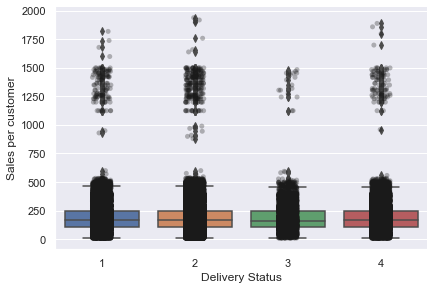

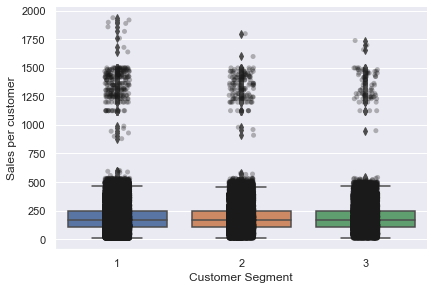

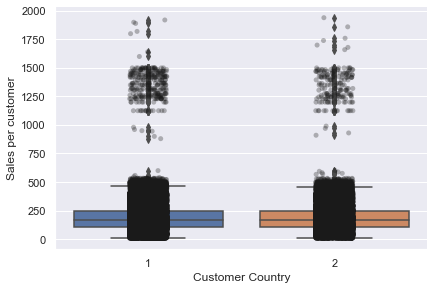

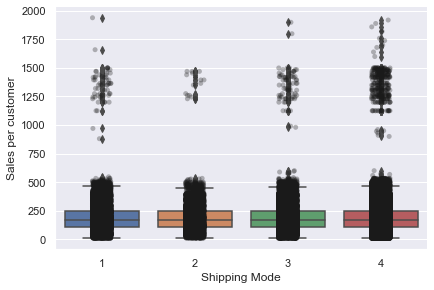

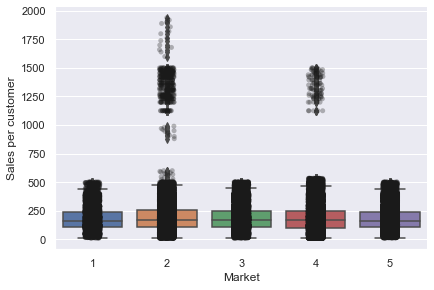

In [2456]:
for var in transfor_vars:
    sns.catplot(x=var, y = 'Sales per customer', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='Sales per customer', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

In [2457]:
otras = [var for var in cat_vars if var not in transfor_vars]

In [2458]:
len(otras)

9

### 2.8 Rare Labels

In [2459]:
def analyse_rare_labels(df, var, rare_perc):
    temp = df.groupby(var)['Sales per customer'].count()/len(df)
    
    return temp[temp < rare_perc]

In [2460]:
for var in otras:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Customer City
Aguadilla      0.000277
Alameda        0.000654
Albany         0.000393
Albuquerque    0.003058
Algonquin      0.000709
                 ...   
Yonkers        0.000764
York           0.001335
Ypsilanti      0.000798
Yuma           0.000510
Zanesville     0.000637
Name: Sales per customer, Length: 558, dtype: float64

Customer Lname
Abbott       0.000166
Acevedo      0.000521
Acosta       0.000576
Adams        0.001651
Adkins       0.000415
               ...   
Zamora       0.000548
Zavala       0.000094
Zhang        0.000249
Zimmerman    0.000881
Zuniga       0.000055
Name: Sales per customer, Length: 1108, dtype: float64

Customer State
91732    0.000006
95758    0.000011
AL       0.000194
AR       0.000908
CT       0.006060
DC       0.003207
DE       0.001490
HI       0.006913
IA       0.000371
ID       0.000925
IN       0.003218
KS       0.002537
KY       0.002698
LA       0.005252
MA       0.008902
MN       0.003723
MO       0.007501
MT       0.000482
ND       0.0011

In [2461]:
#for var in otras:
    #sns.catplot(x=var, y = 'Sales per customer', data=data, kind="box", height=4, aspect=1.5)
    #sns.stripplot(x=var, y='Sales per customer', data=data, jitter=0.1, alpha=0.3,color='k')
    #plt.show()

In [2462]:
print(analyse_rare_labels)

<function analyse_rare_labels at 0x0000021BBC366E50>


### Split para analisis de datos previo a generar modelo

In [2463]:
#separamos data para entrenamiento y prueba,
X_train, X_test, y_train, y_test = train_test_split(
                        data.drop(['Sales per customer'], axis=1),
                        data['Sales per customer'],
                        test_size=0.25,
                        random_state=2021)

In [2464]:
X_train.shape, X_test.shape, y_train.shape

((135389, 20), (45130, 20), (135389,))

### 2.10 Missing Values

In [2465]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars = cat_vars + ['Late_delivery_risk'] 

In [2466]:
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

In [2467]:
len(cat_vars)

10

##### 2.10.1.1 Detección de NaN en variables categórias

In [2468]:
cat_vars_with_na = [var for var in cat_vars 
                        if X_train[var].isnull().sum() > 0]

In [2469]:
cat_vars_with_na

['Customer Lname']

In [2470]:
X_train[cat_vars_with_na].isnull().mean().sort_values(ascending = False)

Customer Lname    0.000052
dtype: float64

In [2471]:
#variables tratadas con etiqueta de faltante por cantidad masiva de faltantes.
vars_with_missing_string = [var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.2]

#variables tratadas con procedimiento por candiad adecuada de faltantes.
vars_freq_category = [var for var in cat_vars_with_na if X_train[var].isnull().mean() <= 0.2]

In [2472]:
vars_with_missing_string

[]

In [2473]:
vars_freq_category

['Customer Lname']

In [2474]:
#Aplicamos criterio para tratar data faltante

#Faltantes con etiqueta missing
X_train[vars_with_missing_string] = X_train[vars_with_missing_string].fillna('Missing')
X_test[vars_with_missing_string] = X_test[vars_with_missing_string].fillna('Missing')

In [2475]:
for var in vars_freq_category:
    mode = X_train[var].mode()[0]
    
    X_train[var].fillna(mode, inplace=True)
    X_test[var].fillna(mode, inplace=True)
    
    print(var, "-------", mode)

Customer Lname ------- Smith


In [2476]:
X_train['Customer Lname'].mode()[0]

'Smith'

In [2477]:
X_train[cat_vars_with_na].isnull().mean().sort_values(ascending = False)

Customer Lname    0.0
dtype: float64

In [2478]:
cat_vars_with_na = [var for var in cat_vars 
                        if X_train[var].isnull().sum() > 0]
cat_vars_with_na

[]

#### 2.10.2 Missing Values para Variables Numéricas

In [2479]:
num_vars = [var for var in X_train.columns if var not in cat_vars and var != 'Sales per customer']

In [2480]:
len(num_vars)

11

In [2481]:
##Numéricas con faltantes
num_vars_with_na = [var for var in num_vars
                       if X_train[var].isnull().sum() > 0]

In [2482]:
X_train[num_vars_with_na].isnull().mean()

Series([], dtype: float64)

In [2483]:
#Eliminamos las siguientes variables porque presentan muchas categorias, informacion no es representativa para la data.

X_train.drop('Customer Lname', axis=1, inplace=True)
X_test.drop('Customer Lname', axis=1, inplace=True)
X_train.drop('Customer City', axis=1, inplace=True)
X_test.drop('Customer City', axis=1, inplace=True)
X_train.drop('Customer State', axis=1, inplace=True)
X_test.drop('Customer State', axis=1, inplace=True)
X_train.drop('Order City', axis=1, inplace=True)
X_test.drop('Order City', axis=1, inplace=True)
X_train.drop('Order Country', axis=1, inplace=True)
X_test.drop('Order Country', axis=1, inplace=True)
X_train.drop('Order State', axis=1, inplace=True)
X_test.drop('Order State', axis=1, inplace=True)
X_train.drop('Product Name', axis=1, inplace=True)
X_test.drop('Product Name', axis=1, inplace=True)
X_train.drop('Order Status', axis=1, inplace=True)
X_test.drop('Order Status', axis=1, inplace=True)

### 2.14 Feature Scaling

In [2484]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)


X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [2485]:
X_train.head()

,Delivery Status,Late_delivery_risk,Customer Country,Customer Segment,Market,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Price,Shipping Mode
0,0.333333,1.0,0.0,0.0,0.25,0.095477,0.990769,0.00,0.095477,0.089263,0.095477,1.0
1,0.666667,0.0,1.0,0.0,0.00,0.030156,0.956923,0.00,0.030156,0.029087,0.030156,0.0
2,0.333333,1.0,1.0,0.0,0.75,0.045226,0.916923,0.75,0.195965,0.151348,0.045226,0.0
3,0.000000,0.0,0.0,0.0,0.75,0.045226,0.876923,0.00,0.045226,0.045278,0.045226,1.0
4,0.333333,1.0,0.0,0.0,0.75,0.095477,0.972308,0.00,0.095477,0.083053,0.095477,0.0


In [2486]:
data.dtypes

Sales per customer          float64
Delivery Status               int64
Late_delivery_risk           object
Customer City                object
Customer Country              int64
Customer Lname               object
Customer Segment              int64
Customer State               object
Market                        int64
Order City                   object
Order Country                object
Order Item Product Price    float64
Order Item Profit Ratio     float64
Order Item Quantity           int64
Sales                       float64
Order Item Total            float64
Order State                  object
Order Status                 object
Product Name                 object
Product Price               float64
Shipping Mode                 int64
dtype: object

In [2487]:
#Guardamos dataset con data preparada para entrenamiento.

X_train.to_csv('preprocess_data/prep_Xtrain.csv', index=False)
X_test.to_csv('preprocess_data/prep_Xtest.csv', index=False)

y_train.to_csv('preprocess_data/prep_ytrain.csv', index=False)
y_test.to_csv('preprocess_data/prep_ytest.csv', index=False)

In [2488]:
joblib.dump(scaler, 'preprocess_data/minmax_scaler.joblib')

['preprocess_data/minmax_scaler.joblib']

### 2.15 Selección de variables

In [2489]:
X_train = pd.read_csv("preprocess_data/prep_Xtrain.csv")
X_test = pd.read_csv("preprocess_data/prep_Xtest.csv")
X_train.head(3)

,Delivery Status,Late_delivery_risk,Customer Country,Customer Segment,Market,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Price,Shipping Mode
0,0.333333,1.0,0.0,0.0,0.25,0.095477,0.990769,0.00,0.095477,0.089263,0.095477,1.0
1,0.666667,0.0,1.0,0.0,0.00,0.030156,0.956923,0.00,0.030156,0.029087,0.030156,0.0
2,0.333333,1.0,1.0,0.0,0.75,0.045226,0.916923,0.75,0.195965,0.151348,0.045226,0.0


In [2490]:
y_train= pd.read_csv("preprocess_data/prep_ytrain.csv")
y_test= pd.read_csv("preprocess_data/prep_ytest.csv")

In [2491]:
y_train.head()

,Sales per customer
0,179.990005
1,63.700001
2,299.970001
3,94.989998
4,167.990005


In [2492]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#objeto selector de variables (PCA en lugar de Lasso para clasificación)
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # Alpha para penalizar y eliminar variables
sel_.fit(X_train, y_train)

C:\Users\Kemik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536167.2533808517, tolerance: 194343.24818074662
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [2493]:
selected_features = X_train.columns[(sel_.get_support())]
print("variables seleccionadas: ", selected_features)
sel_.get_support().sum()

variables seleccionadas:  Index(['Order Item Product Price', 'Sales', 'Order Item Total',
       'Product Price'],
      dtype='object')


4

## 5. Entrenamiento del Modelo

In [2494]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### 5.1 Modelo

In [2495]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
#X_train, y_train = load_diabetes(return_X_y=True)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train.values.ravel())
cross_val_score(regressor, X_train, y_train, cv=10)

#Se utiliza este modelo porque la variable a predecir "Sales per customer" es continua no categórica.

array([0.99999797, 0.9999945 , 0.99999783, 0.99989266, 0.99999987,
       0.99999253, 0.99999267, 0.99999746, 0.99999993, 0.99999499])

### **2.16 Predicciones**

In [2496]:
from sklearn.metrics import mean_squared_error, r2_score

In [2498]:
y_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

### 2.17 Validacion de resultados con matriz de confusion

Classification 	 Train: 1.0
Classification 	 Test: 0.9999959662860297


ValueError: continuous is not supported

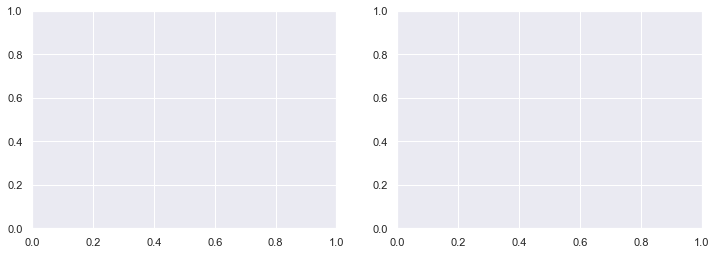

In [2499]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.metrics import confusion_matrix

print("Classification \t Train:", regressor.score(X_train, y_train))
print("Classification \t Test:", regressor.score(X_test, y_test))

f, axes = plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(y_test, y_pred),
          annot = True, fmt=".0f", annot_kws={"size":18}, ax=axes[1])

### *Accuracy*

In [ ]:
from sklearn.metrics import accuracy_score
#print('El accuracy obtenido del modelo es: ',accuracy_score(y_test, y_pred))

from sklearn import metrics

print('El accuracy obtenido del modelo es:', metrics.accuracy_score(y_test, y_pred))

#### **El accuracy obtenido es de 78%**

### *2.18 Configuracion de Pipeline*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.pipeline import Pipeline

from feature_engine.imputation import(
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer)

from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder)

from feature_engine.transformation import LogTransformer
from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper
import joblib

In [ ]:
# Libreria con formato"py"
import my_preprocessors as mypp

In [ ]:
data = pd.read_csv('SupplyChain.csv', index_col=0, encoding='latin-1', delimiter= ';')

print(str(data.shape) + '\n')

data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        data.drop(['Sales per customer', 'Category Id', 'Customer Id', 'Product Category Id', 'Order Customer Id'
                  , 'Department Id', 'Order Id', 'Order Item Id'], axis=1),
        data['Sales per customer'],
        test_size=0.1,
        random_state=2022)

X_train.shape, X_test.shape

### *2.18.1 Feature Selection*

In [ ]:
#Variables categoricas con NA
CATEGORICAL_VARS_WITH_NA = []

CATEGORICAL_VARS_WITH_NA_FREQ = ['Customer Lname']

#Variables numéricas con NA
NUMERICAL_VARS_WITH_NA = []

#Variables para hacer mapeo categorico 
DELIVERY_VARS =  ['Delivery Status']
SEGMENT_VARS = ['Customer Segment']
COUNTRY_VARS = ['Customer Country']
SHIPPING_VARS = ['Shipping Mode']
MARKET_VARS = ['Market']

#Mapeos de variables categoricas
DELIVERY_MAP = {'Advance shipping':1, 'Late delivery':2, 'Shipping canceled':3, 'Shipping on time':4, 
                    'Missing':0, 'NA':0, 'NaN':0}
SEGMENT_MAP = {'Consumer':1, 'Corporate':2, 'Home Office':3, 'Missing':0, 'NA':0, 'NaN':0}
COUNTRY_MAP = {'EE. UU.':1, 'Puerto Rico':2, 'Missing':0, 'NA':0, 'NaN':0}
SHIPPING_MAP = {'First Class':1, 'Same Day':2, 'Second Class':3, 'Standard Class':4, 'Missing':0, 'NA':0, 'NaN':0}
MARKET_MAP = {'Africa':1, 'Europe':2, 'LATAM':3, 'Pacific Asia':4, 'USCA':5, 'Missing':0, 'NA':0, 'NaN':0}

#Variables seleccionadas según análisis de Lasso
FEATURES = ['Order Item Product Price', 'Sales', 'Order Item Total','Product Price']

#Variables a eliminar
DROP_VAR=  ['Customer Lname', 'Customer City', 'Customer State', 'Order City', 'Order Country', 'Order State',
           'Product Name', 'Order Status']

### *2.19 Machine Learning Pipeline*

In [ ]:
salescustomer_pipeline = Pipeline([
    
    #============= IMPUTACIONES ===================#
    
      
    #1. Imputación de variables categoricas con NA basado en frequiencia.
    ('frequent_imputation', 
         CategoricalImputer(imputation_method='frequent', variables=CATEGORICAL_VARS_WITH_NA_FREQ)
    ),
    
    #2. Faltante en variables numéricas
    ('missing_indicator', AddMissingIndicator(variables=NUMERICAL_VARS_WITH_NA)),
    
    #3. Imputación de mediana para variables categoricas
    ('mean_imputation', MeanMedianImputer(
        imputation_method='mean', variables=NUMERICAL_VARS_WITH_NA)
    ),
    
    #============= TRANSFORMACIÓN DE VARIABLES NUMÉRICAS =============
    
    #4. Transformación logaritmica
    #('log', LogTransformer(variables=NUMERICALS_LOG_VARS)),
    
    #=============== CODIFICACION DE VARIABLES CATEGORICAS ORDINALES ==============

    ('mapper_quality', mypp.Mapper(
        variables=DELIVERY_VARS, mappings=DELIVERY_MAP)),
    
    ('mapper_quality', mypp.Mapper(
        variables=SEGMENT_VARS, mappings=SEGMENT_MAP)),
    
     ('mapper_quality', mypp.Mapper(
        variables=SHIPPING_VARS, mappings=SHIPPING_MAP)),
    
    ('mapper_exposure', mypp.Mapper(
        variables=COUNTRY_VARS, mappings=COUNTRY_MAP)),
    
    ('mapper_exposure', mypp.Mapper(
        variables=MARKET_VARS, mappings=MARKET_MAP)),
    
    #=========== SCALER ==============
    ('scaler', MinMaxScaler()),
    
    #=========== ENTRENAMIENTO DEL MODELO ============
    ('Lasso', Lasso(alpha=0.01, random_state=2022)),
]) 

### *2.19.1 Seleccion de variables para predecir*

In [ ]:
X_train = X_train[FEATURES]

In [ ]:
salescustomer_pipeline.fit(X_train, y_train)

In [ ]:
#Seleccion de variables para predicción
X_test = X_test[FEATURES]

In [ ]:
preds = salescustomer_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error 

In [ ]:
mean_squared_error(np.exp(y_test), np.exp(preds), squared=False)

In [ ]:
X_test.head(3)

In [ ]:
import joblib

### *2.19.2 Exportacion de modelo*

In [ ]:
#Procedemos a guardar el pipeline
joblib.dump(salescustomer_pipeline, 'salescustomer_pipeline.pkl')

In [ ]:
X_train.head(3)

In [ ]:
type(salescustomer_pipeline)

In [ ]:
data = pd.read_csv('SupplyChain.csv')
data.to_json('Proyecto.json', orient='records')

**-CONCLUSION DE PIPELINE-**